# Manejo de temporadas y contratos

In [1]:
import pandas as pd
import numpy as np

## Unir t, t-1 con t-2

In [2]:
# Función para corregir 'season' y 'season_part' según 'transfer_date'
def corregir_temporada(df):
    # Convertir 'transfer_date' a datetime
    df['transfer_date'] = pd.to_datetime(df['transfer_date'])
    
    # Crear máscara para fechas entre enero y abril
    mask_invierno = df['transfer_date'].dt.month <= 4
    
    # Calcular 'season' y 'season_part' corregidos
    df['season'] = np.where(mask_invierno, 
                           df['transfer_date'].dt.year - 1, 
                           df['transfer_date'].dt.year).astype(int)
    
    df['season_part'] = np.where(mask_invierno, 'invierno', 'verano')
    
    return df

In [3]:
df = pd.read_excel('df_transf12_notlongs.xlsx') 
df_t2 = pd.read_excel('df_transf12_notlongs_t-2.xlsx') 

In [4]:
# Aplicar corrección a ambos DataFrames
df = corregir_temporada(df)
df_t2 = corregir_temporada(df_t2)

In [5]:
df_t2=df_t2[['player_name', 'season',
       'season_part', 'code_from', 'code_to', 'Internacional_pj_ant2', 'Local_pj_ant2',
       'Internacional_Goals_ant2', 'Local_Goals_ant2',
       'Internacional_Assists_ant2', 'Local_Assists_ant2',
       'Internacional_Own goals_ant2', 'Local_Own goals_ant2',
       'Internacional_Subbed In_ant2', 'Local_Subbed In_ant2',
       'Internacional_Subbed out_ant2', 'Local_Subbed out_ant2',
       'Internacional_Yellow Cards_ant2', 'Local_Yellow Cards_ant2',
       'Internacional_Double yellow_ant2', 'Local_Double yellow_ant2',
       'Internacional_Red Cards_ant2', 'Local_Red Cards_ant2',
       'Internacional_Penalty Kicks_ant2', 'Local_Penalty Kicks_ant2',
       'Internacional_Minutes played_ant2', 'Local_Minutes played_ant2',
       'Internacional_long_season_ant2', 'Local_long_season_ant2',
       'Club_playing_ant2', 'id_club_playing_ant2',
       'competition_season_tuples_ant2', 'Internacional_Goals Conceded_ant2',
       'Internacional_Clean Sheets_ant2', 'Local_Goals Conceded_ant2',
       'Local_Clean Sheets_ant2']]

df_full = df.merge(df_t2, how='left', on=['player_name', 'season', 'season_part', 'code_from', 'code_to'])

In [6]:
# Identificar columnas que contienen "long_season"
long_season_columns = [col for col in df_full.columns if 'long_season' in col]

# Verificar cada columna y eliminar si solo contiene 0 y/o NaN
columns_to_drop = [col for col in long_season_columns if df_full[col].isin([0, np.nan]).all()]

if columns_to_drop:
    print(f"Eliminando columnas que solo contienen 0 y/o NaN: {columns_to_drop}")
    df_full = df_full.drop(columns=columns_to_drop)
else:
    print("No se encontraron columnas 'long_season' que solo contengan 0 y/o NaN")

Eliminando columnas que solo contienen 0 y/o NaN: ['Internacional_long_season_ant', 'Local_long_season_ant', 'Local_long_season_act', 'Internacional_long_season_act', 'Internacional_long_season_ant2', 'Local_long_season_ant2']


In [7]:
# Eliminar filas donde code_from o code_to sea 515
df_full = df_full[~((df_full['code_from'] == 515) | (df_full['code_to'] == 515))]

In [8]:
print(f"Filas antes del filtrado: {len(df_full)}")
df_full = df_full[df_full['season'].between(2021, 2024)]
print(f"Filas después del filtrado: {len(df_full)}")

Filas antes del filtrado: 1487
Filas después del filtrado: 1486


In [9]:
df_full

,player_name,player_url,player_id,age,nationality,comunitario,extranjero,position,transfer_fee,season,...,Local_Penalty Kicks_ant2,Internacional_Minutes played_ant2,Local_Minutes played_ant2,Club_playing_ant2,id_club_playing_ant2,competition_season_tuples_ant2,Internacional_Goals Conceded_ant2,Internacional_Clean Sheets_ant2,Local_Goals Conceded_ant2,Local_Clean Sheets_ant2
0,Fabricio Coloccini,/fabricio-coloccini/profil/spieler/6150,6150,39,"['Argentina', 'Italia']",1,0,Defensa central,0,2021,...,0.0,720.0,1412.0,['CA San Lorenzo de Almagro'],['1775'],"{'Internacional': [('Libertadores', '2019')], ...",NaN,NaN,NaN,NaN
1,Alejandro Aranda,/alejandro-aranda/profil/spieler/440018,440018,26,['Argentina'],0,0,Delantero centro,0,2021,...,0.0,0.0,91.0,"['CA Nueva Chicago', 'CA Estudiantes']","['10534', '14312']","{'Local': [('Primera Nacional', '2019'), ('Cop...",NaN,NaN,NaN,NaN
2,Francisco Cerro,/francisco-cerro/profil/spieler/125107,125107,33,['Argentina'],0,0,Pivote,0,2021,...,0.0,0.0,120.0,['CSD Defensa y Justicia'],['2402'],"{'Local': [('Liga Profesional (- 23/24)', '201...",NaN,NaN,NaN,NaN
3,Martín Cauteruccio,/martin-cauteruccio/profil/spieler/76599,76599,34,"['Uruguay', 'Italia']",1,1,Delantero centro,0,2021,...,0.0,0.0,252.0,"['CD Cruz Azul', 'CD Cruz Azul U20']","['3711', '25928']","{'Local': [('Liga MX Apertura', '19/20'), ('Li...",NaN,NaN,NaN,NaN
4,Federico Gino,/federico-gino/profil/spieler/273130,273130,28,"['Uruguay', 'Italia']",1,1,Mediocentro,0,2021,...,0.0,0.0,1702.0,['CA Aldosivi'],['12301'],"{'Local': [('Liga Profesional (- 23/24)', '201...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,Francisco Fydriszewski,/francisco-fydriszewski/profil/spieler/337921,337921,31,"['Argentina', 'Polonia']",1,0,Delantero centro,0,2024,...,5.0,0.0,2017.0,['SD Aucas'],['6362'],"{'Local': [('Serie A Tercera Etapa', '2022'), ...",NaN,NaN,NaN,NaN
1495,Andrés Vombergar,/andres-vombergar/profil/spieler/486926,486926,29,"['Eslovenia', 'Argentina']",0,0,Delantero centro,0,2024,...,0.0,0.0,888.0,['CA San Lorenzo de Almagro'],['1775'],"{'Local': [('Liga Profesional (- 23/24)', '202...",NaN,NaN,NaN,NaN
1496,Iker Muniain,/iker-muniain/profil/spieler/54235,54235,31,['España'],1,1,Mediocentro ofensivo,0,2024,...,0.0,0.0,2065.0,['Athletic Club'],['621'],"{'Local': [('LaLiga', '22/23'), ('Copa del Rey...",NaN,NaN,NaN,NaN
1497,Agustín Giay,/agustin-giay/profil/spieler/849582,849582,20,['Argentina'],0,0,Lateral derecho,7000000,2024,...,0.0,0.0,1610.0,['CA San Lorenzo de Almagro'],['1775'],"{'Local': [('Liga Profesional (- 23/24)', '202...",NaN,NaN,NaN,NaN


## Analisis de fechas

In [11]:
if 'df_full' not in locals():
    print("Cargando df_full desde el archivo...")
    df_full = pd.read_excel("df_transf12_full.xlsx")
else:
    print("df_full ya existe en memoria")

df_full ya existe en memoria


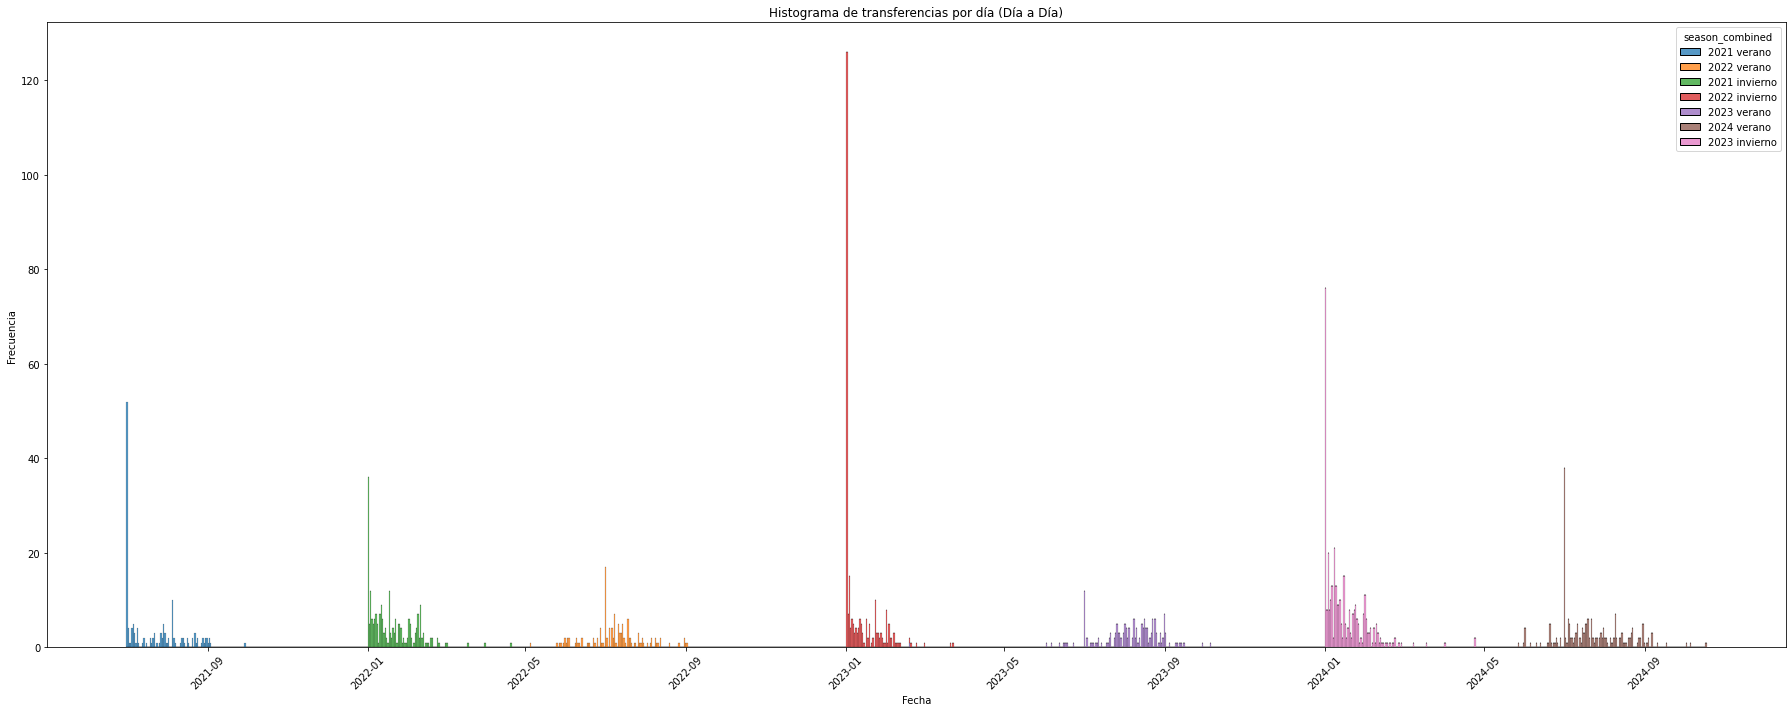

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse que 'transfer_date' sea datetime
df_full['transfer_date'] = pd.to_datetime(df_full['transfer_date'])

# Crear columna combinada de 'season' y 'season_part'
df_full['season_combined'] = df_full['season'].astype(str) + " " + df_full['season_part'].astype(str)

# Crear histograma con binning diario
plt.figure(figsize=(25, 10))
sns.histplot(
    data=df_full,
    x='transfer_date',
    hue='season_combined',
    binwidth=1,  # Cada barra representa un día
    multiple='stack'  # Apilado por colores
)
plt.title('Histograma de transferencias por día (Día a Día)')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


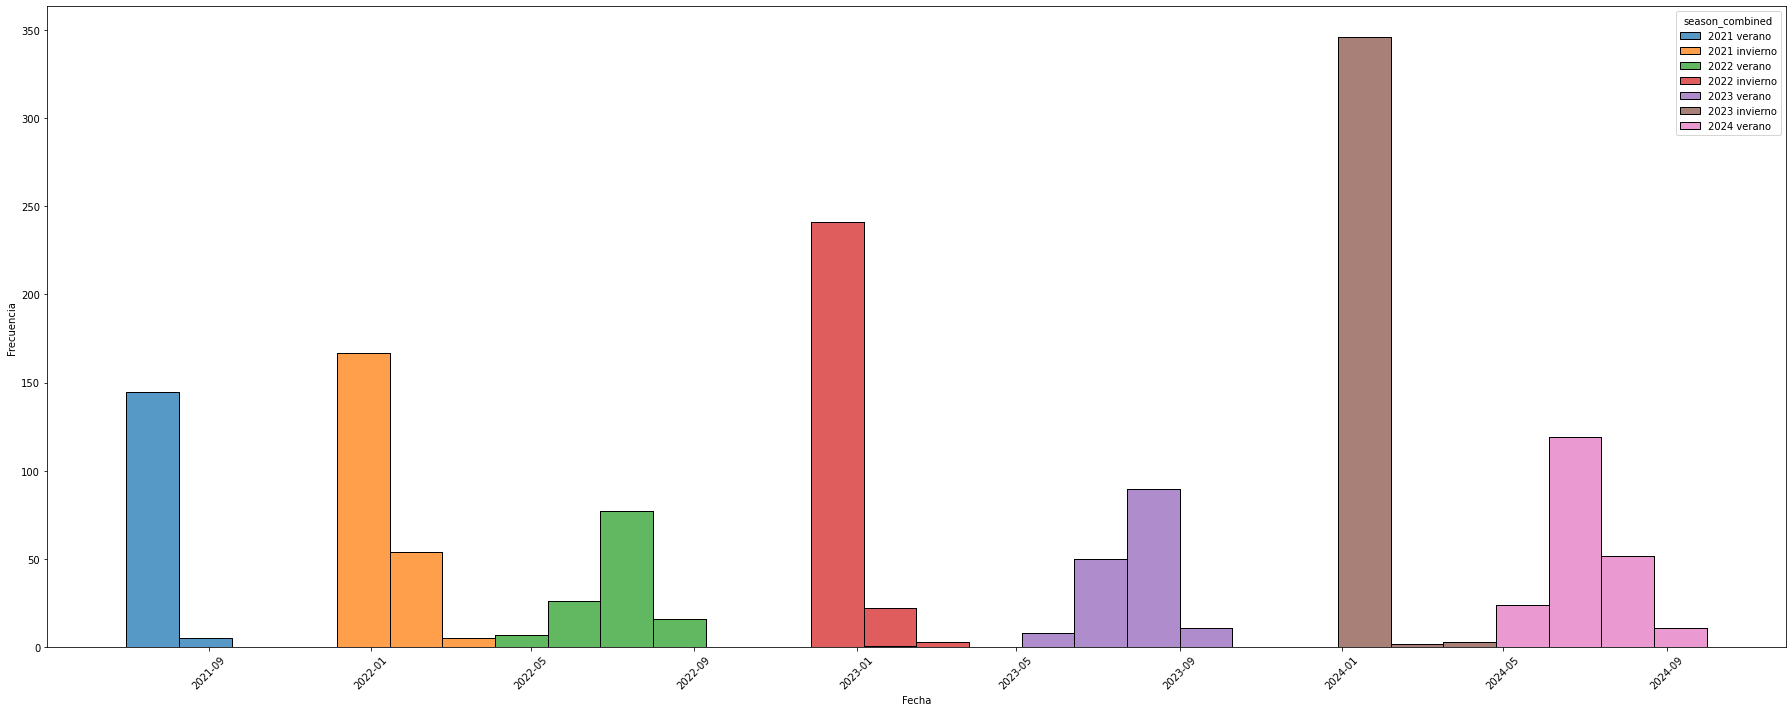

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse que 'transfer_date' sea datetime
df_full['transfer_date'] = pd.to_datetime(df_full['transfer_date'])

# Crear columna para el mes
df_full['transfer_month'] = df_full['transfer_date'].dt.to_period('M')

# Crear columna combinada de 'season' y 'season_part'
df_full['season_combined'] = df_full['season'].astype(str) + " " + df_full['season_part'].astype(str)

# Contar observaciones por mes y season_combined
monthly_counts = df_full.groupby(['transfer_month', 'season_combined']).size().reset_index(name='count')
monthly_counts['transfer_month'] = monthly_counts['transfer_month'].astype(str).apply(lambda x: pd.to_datetime(x + '-01'))

# Crear el gráfico
plt.figure(figsize=(25, 10))
sns.histplot(
    data=monthly_counts,
    x='transfer_month',
    weights='count',  # Usar los conteos como pesos
    hue='season_combined',
    multiple='stack',
    bins=len(monthly_counts['transfer_month'].unique())  # Un bin por cada mes único
)

plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

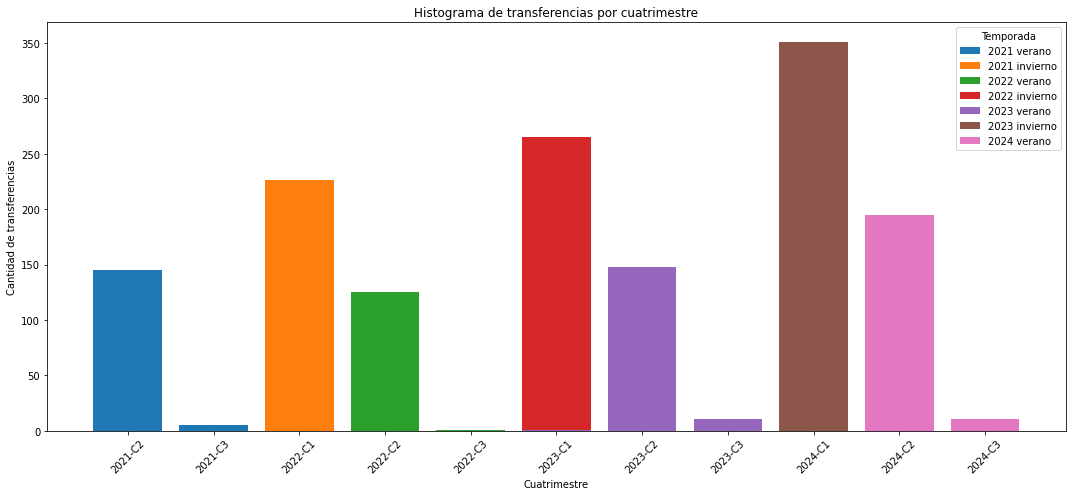

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que 'transfer_date' sea datetime
df_full['transfer_date'] = pd.to_datetime(df_full['transfer_date'])

# Asignar cuatrimestre correcto
def get_cuatrimestre(date):
    year = date.year
    if date.month <= 4:
        return f"{year}-C1"
    elif date.month <= 8:
        return f"{year}-C2"
    else:
        return f"{year}-C3"

df_full['cuatrimestre'] = df_full['transfer_date'].apply(get_cuatrimestre)

# Contar cantidad de transferencias por cuatrimestre
df_grouped = df_full.groupby(['cuatrimestre', 'season_combined']).size().reset_index(name='count')

# Ordenar cuatrimestres correctamente
df_grouped['cuatrimestre'] = pd.Categorical(df_grouped['cuatrimestre'], 
                                             categories=sorted(df_grouped['cuatrimestre'].unique()),
                                             ordered=True)

# 📌 Graficar con Matplotlib
fig, ax = plt.subplots(figsize=(15, 7))

# Dibujar las barras por cada temporada
for season in df_grouped['season_combined'].unique():
    data = df_grouped[df_grouped['season_combined'] == season]
    ax.bar(data['cuatrimestre'], data['count'], label=season)  

# 🔹 Formatear el eje X con etiquetas correctas de cuatrimestres
plt.xticks(rotation=45)

# Mejoras gráficas
plt.title('Histograma de transferencias por cuatrimestre')
plt.xlabel('Cuatrimestre')
plt.ylabel('Cantidad de transferencias')
plt.legend(title="Temporada")
plt.tight_layout()
plt.show()


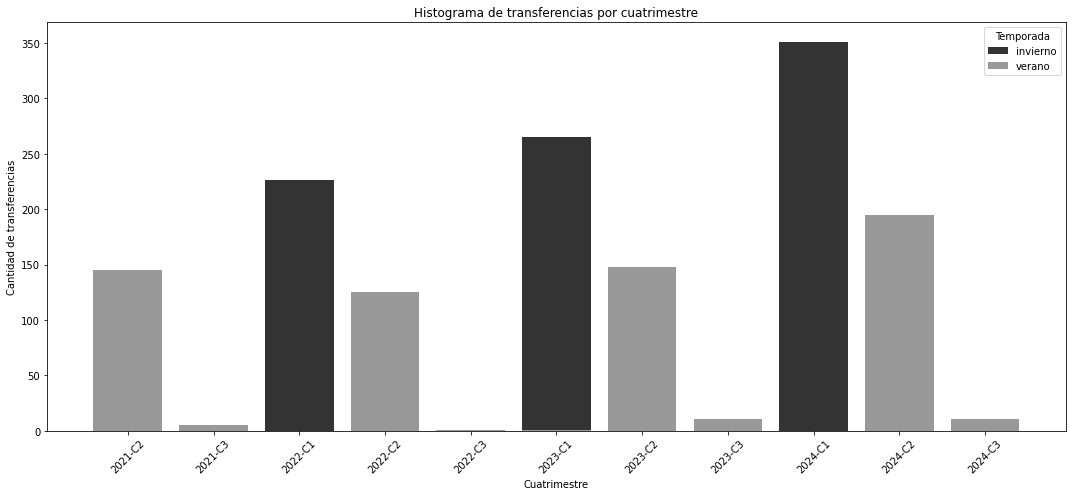

In [20]:
# Asegurar que 'transfer_date' sea datetime
df_full['transfer_date'] = pd.to_datetime(df_full['transfer_date'])

# Asignar cuatrimestre correcto
def get_cuatrimestre(date):
    year = date.year
    if date.month <= 4:
        return f"{year}-C1"
    elif date.month <= 8:
        return f"{year}-C2"
    else:
        return f"{year}-C3"

df_full['cuatrimestre'] = df_full['transfer_date'].apply(get_cuatrimestre)

# Agrupar por cuatrimestre y season_part
counts = df_full.groupby(['cuatrimestre', 'season_part']).size().unstack(fill_value=0)

# Ordenar el índice manualmente
# Primero obtenemos todos los cuatrimestres únicos
unique_cuatrimestres = sorted(df_full['cuatrimestre'].unique(), 
                              key=lambda x: (int(x.split('-')[0]), int(x.split('-C')[1])))

# Reindexar para asegurar el orden correcto
counts = counts.reindex(unique_cuatrimestres)

# 📌 Graficar con Matplotlib
fig, ax = plt.subplots(figsize=(15, 7))

# Colores sobrios
colors = {'verano': '#999999', 'invierno': '#333333'}  # gris claro y gris oscuro/negro

# Obtener las columnas (season_part)
seasons = counts.columns

# Dibujar las barras
for season in seasons:
    ax.bar(counts.index, counts[season], label=season, color=colors.get(season.lower(), 'gray'))

# Formatear el eje X
plt.xticks(rotation=45)
plt.title('Histograma de transferencias por cuatrimestre')
plt.xlabel('Cuatrimestre')
plt.ylabel('Cantidad de transferencias')
plt.legend(title="Temporada")
plt.tight_layout()
plt.show()

In [6]:
tabla_temporadas = pd.crosstab(df_full['season'], df_full['season_part'])
print("Número de observaciones por temporada y parte de temporada:")
print(tabla_temporadas)
print(len(df_full))

Número de observaciones por temporada y parte de temporada:
season_part  invierno  verano
season                       
2021              226     150
2022              265     126
2023              351     160
2024                0     206
1484


In [7]:

jugadores_con_precio = df_full[df_full['transfer_fee'] != 0]
tabla_temporadas = pd.crosstab(jugadores_con_precio['season'], jugadores_con_precio['season_part'])
print("Número de observaciones por temporada y parte de temporada:")
print(tabla_temporadas)
print(len(jugadores_con_precio))

Número de observaciones por temporada y parte de temporada:
season_part  invierno  verano
season                       
2021               59      35
2022               67      40
2023               98      77
2024                0      77
453


## Limpieza BD + Clusters

In [11]:
import ast
from tmkt_info_club import *
# from obtener_transferidos import *


In [12]:
# Función integrada para convertir cadenas de texto en listas y obtener el primer valor
def convert_and_get_first_value(x):
    try:
        # Convertir la cadena de texto en lista
        x = ast.literal_eval(x)
    except (ValueError, SyntaxError):
        pass
    
    # Obtener el primer valor de la lista o NaN
    if isinstance(x, list) and len(x) > 0:
        return x[0]
    else:
        return np.nan

In [12]:
# Resetear nombre
df = df_full

In [13]:


#%%
df['club_current'] = df['Club_playing_act'].apply(convert_and_get_first_value)
df['club_last'] = df['Club_playing_ant'].apply(convert_and_get_first_value)

df['code_last'] = df['id_club_playing_ant'].apply(convert_and_get_first_value)
df['code_current'] = df['id_club_playing_act'].apply(convert_and_get_first_value)

df['prev_season'] = df['season'] - 1

In [14]:
club_sets = [
    ('code_last', 'club_last', 'prev_season', '_last'),
    ('code_current', 'club_current', 'prev_season', '_curr'),
    # ('code_from', 'club_from', 'prev_season', '_from'),
    # ('code_to', 'club_to', 'prev_season', '_to')
    ]
# club_sets = [('code_last', 'club_last', 'season', '_last')
#     ]

df = add_infoclub_to_df(df, club_sets, DEBUG=True, max_workers=20, block_size=1000)

df.drop(columns='prev_season', inplace=True)

Procesando bloque 1/1 con 597 clubes...
Scrapeos evitados: 597


In [15]:
dif_from_last = df['club_from'] != df['club_last']
dif_from_curr = df['club_from'] != df['club_current']


dif_from_last = dif_from_last.astype(int)
dif_from_curr = dif_from_curr.astype(int)


dif_from_last = np.where(df['club_last'].isna(), np.nan, dif_from_last)
dif_from_curr = np.where(df['club_current'].isna(), np.nan, dif_from_curr)

df['cedido_last'] = np.where(df['club_current'].isna(), dif_from_last, dif_from_curr)

In [16]:
into_last = df['club_to'] == df['club_last']
# into_curr = df['club_to'] == df['club_current']
# 

into_last = into_last.astype(int)
# into_curr = into_curr.astype(int)

into_last = np.where(df['club_last'].isna(), np.nan, into_last)
# into_curr =np.where(df['club_current'].isna(), np.nan, into_curr)

# df['into_last'] = np.where(df['club_current'].isna(), into_last, into_curr)

In [17]:
df['varg'] = (df["club_nationality_from"]=='Argentina').astype(int)
df['carg'] = (df["club_nationality_to"]=='Argentina').astype(int)

big5 = ['España', 'Italia', 'Alemania', 'Francia', 'Inglaterra']
bigger_market = big5 + ['Arabia Saudita ', 'China', 'Portugal', 'Rusia', 'México', 'Brasil','Países Bajos', 'Bélgica', 'Turquía', 'Estados Unidos']

df['vmay'] = (df["club_nationality_from"].isin(bigger_market)).astype(int)
df['cmay'] = (df["club_nationality_to"].isin(bigger_market)).astype(int)
df['vnomay'] = ((~df.club_nationality_from.isin(bigger_market)) & (df["club_nationality_from"]!='Argentina')).astype(int)
df['cnomay'] = ((~df.club_nationality_to.isin(bigger_market)) & (df["club_nationality_to"]!='Argentina')).astype(int)


df['v5g'] = (df["club_nationality_from"].isin(big5)).astype(int)
df['c5g'] = (df["club_nationality_to"].isin(big5)).astype(int)
df['vno5g'] = ((~df.club_nationality_from.isin(big5)) & (df["club_nationality_from"]!='Argentina')).astype(int)
df['cno5g'] = ((~df.club_nationality_to.isin(big5)) & (df["club_nationality_to"]!='Argentina')).astype(int)


ryb = ['CA River Plate', 'CA Boca Juniors']

resto_gdes = ['CA San Lorenzo de Almagro ', 'CA Independiente', 'Racing Club ']

medianos = ["CA Newell\'s Old Boys", 'CA Rosario Central ', 'CA Lanús',
            'Club Estudiantes de La Plata', 'CA Talleres'
            'CA Vélez Sarsfield ']

In [18]:
df['cryb'] = (df["club_to"].isin(ryb)).astype(int)
df['vryb'] = (df["club_from"].isin(ryb)).astype(int)
df['crgde'] = (df["club_to"].isin(resto_gdes)).astype(int)
df['vrgde'] = (df["club_from"].isin(resto_gdes)).astype(int)
df['cmed'] = (df["club_to"].isin(medianos)).astype(int)
df['vmed'] = (df["club_from"].isin(medianos)).astype(int)

### Determinación de clusters

In [11]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

In [13]:
n_clusters = 4
n_components = 2

In [14]:


# 1. Filtrar por clubes argentinos para ventas (club_from)
df_arg_from = df[df['club_nationality_from'] == 'Argentina']

# Codificar division_from (Primera categoría = 1, Segunda categoría = 2, NaN = 0)
df_arg_from['division_from'] = df_arg_from['division_from'].map({
    'Primera categoría': 1,
    'Segunda categoría': 2
}).fillna(3)  # Reemplazar NaN con 0

# Agrupar por club_from (ventas)
ventas_agg = df_arg_from.groupby('club_from').agg({
    'transfer_fee': 'sum',  # Ingresos por transferencias
    'player_id': 'count',   # Cantidad de jugadores vendidos
    'market_value': 'sum', # Valor de mercado promedio de los jugadores vendidos
    'age': 'mean',          # Edad promedio de los jugadores vendidos
    
    # Columnas relevantes del club como vendedor
    'league_position_from': 'mean',  # Posición promedio en la liga
    'puntos_from': 'sum',           # Promedio de puntos por temporada
    'goles_favor_from': 'sum',      # Goles a favor promedio por temporada
    'goles_contra_from': 'sum',     # Goles en contra promedio por temporada
    'valor_plantel_from': 'sum',    # Valor del plantel promedio
    'mean_plantel_from': 'mean',     # Valor promedio por jugador del plantel
    'partidos_jugados_from': 'sum', # Partidos jugados promedio por temporada
    'division_from': 'max'           # Categoría de división (Primera = 1, Segunda = 2)
}).rename(columns={
    'transfer_fee': 'ingresos_transferencias',
    'player_id': 'jugadores_vendidos',
    'market_value': 'valor_vendido',
    'age': 'edad_vendida',
    'league_position_from': 'posicion_liga',
    'puntos_from': 'puntos',
    'goles_favor_from': 'goles_favor',
    'goles_contra_from': 'goles_contra',
    'valor_plantel_from': 'valor_plantel',
    'mean_plantel_from': 'valor_medio_plantel',
    'partidos_jugados_from': 'partidos_jugados'
}).reset_index().rename(columns={'club_from': 'club'})  # Renombramos club_from a club

# 2. Filtrar por clubes argentinos para compras (club_to)
df_arg_to = df[df['club_nationality_to'] == 'Argentina']

# Codificar division_to (Primera categoría = 1, Segunda categoría = 2)
df_arg_to['division_to'] = df_arg_to['division_to'].map({
    'Primera categoría': 1,
    'Segunda categoría': 2
}).fillna(3)

# Agrupar por club_to (compras)
compras_agg = df_arg_to.groupby('club_to').agg({
    'transfer_fee': 'sum',  # Gastos por transferencias
    'player_id': 'count',   # Cantidad de jugadores comprados
    'market_value': 'sum', # Valor de mercado promedio de los jugadores comprados
    'age': 'mean',          # Edad promedio de los jugadores comprados
    'division_to': 'max'    # Categoría de división (Primera = 1, Segunda = 2)
}).rename(columns={
    'transfer_fee': 'gastos_transferencias',
    'player_id': 'jugadores_comprados',
    'market_value': 'valor_comprado',
    'age': 'edad_comprada'
}).reset_index().rename(columns={'club_to': 'club'})  # Renombramos club_to a club

# 3. Concatenar ventas y compras por la columna 'club'
club_agg = pd.merge(ventas_agg, compras_agg, how='outer', on='club')

# Rellenar posibles valores NaN (en caso de que un club solo haya comprado o vendido)
club_agg.fillna(0, inplace=True)

club_agg = club_agg[(club_agg.division_from==1) | (club_agg.division_to==1)].drop(club_agg[club_agg['club']=='CA Patronato'].index)


C:\Users\Terminal-NTB\AppData\Local\Temp\ipykernel_6768\2471089118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arg_from['division_from'] = df_arg_from['division_from'].map({
C:\Users\Terminal-NTB\AppData\Local\Temp\ipykernel_6768\2471089118.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arg_to['division_to'] = df_arg_to['division_to'].map({


In [15]:
club_agg

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,valor_medio_plantel,partidos_jugados,division_from,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to
0,AA Argentinos Juniors,46053000.0,35.0,61150000.0,27.514286,12.142857,1308.0,1022.0,846.0,1.187930e+09,7.714286e+05,929.0,1.0,12439000.0,25.0,22900000.0,27.360000,1.0
4,Arsenal FC,1296000.0,27.0,12875000.0,28.259259,25.037037,680.0,546.0,858.0,3.042000e+08,2.526667e+05,709.0,1.0,921000.0,18.0,7050000.0,26.777778,1.0
11,CA Banfield,27808000.0,35.0,43800000.0,28.457143,22.142857,1023.0,754.0,1060.0,9.420300e+08,5.273429e+05,935.0,1.0,4531000.0,31.0,18725000.0,29.161290,1.0
16,CA Boca Juniors,100629000.0,34.0,129625000.0,26.588235,4.705882,1485.0,1148.0,758.0,4.293030e+09,2.197353e+06,888.0,1.0,46761000.0,26.0,67475000.0,27.730769,1.0
19,CA Central Córdoba (SdE),9184000.0,49.0,15650000.0,30.122449,20.469388,1474.0,1373.0,1689.0,7.188100e+08,3.192857e+05,1299.0,1.0,4184000.0,46.0,13475000.0,29.065217,1.0
30,CA Huracán,19162000.0,29.0,42775000.0,28.137931,15.724138,980.0,700.0,744.0,6.286600e+08,4.344483e+05,767.0,1.0,7076000.0,37.0,30200000.0,28.945946,1.0
31,CA Independiente,19256000.0,38.0,55950000.0,28.500000,14.447368,1314.0,1046.0,1068.0,1.785690e+09,9.828158e+05,1008.0,1.0,13401000.0,28.0,29325000.0,28.392857,1.0
34,CA Lanús,55345000.0,28.0,46825000.0,26.357143,15.000000,929.0,922.0,1026.0,1.239100e+09,9.907500e+05,740.0,1.0,11678000.0,24.0,28475000.0,29.916667,1.0
38,CA Newell's Old Boys,19510000.0,30.0,36550000.0,27.133333,15.966667,999.0,730.0,817.0,8.795000e+08,6.086000e+05,790.0,1.0,11953000.0,22.0,25225000.0,27.681818,1.0
41,CA Platense,4861000.0,29.0,8250000.0,30.310345,17.862069,943.0,792.0,838.0,2.955000e+08,2.198276e+05,767.0,1.0,2087000.0,26.0,15300000.0,29.307692,1.0


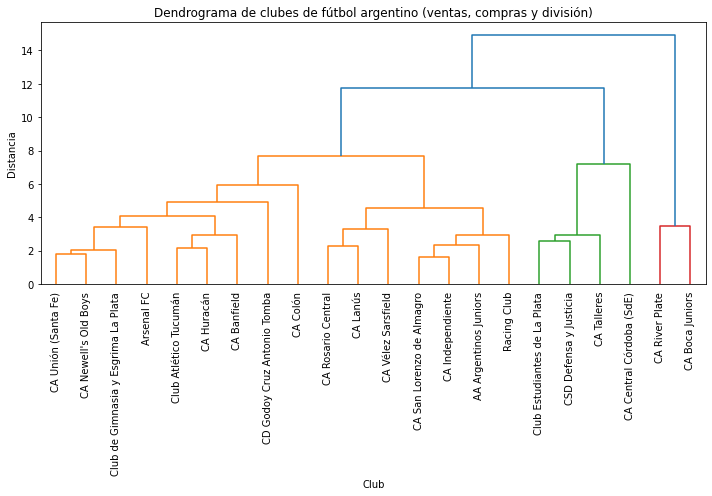

In [22]:
# 4. Preprocesamiento de los datos (normalización)
columns_to_scale = [
      # Agregamos division_to
]

scaler = StandardScaler()
club_agg_scaled = scaler.fit_transform(club_agg[columns_to_scale])

# 5. Aplicar clustering jerárquico aglomerativo
linked = linkage(club_agg_scaled, method='ward')

# 6. Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           labels=club_agg['club'].values,  # Etiquetas de los clubes
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de clubes de fútbol argentino (ventas, compras y división)')
plt.xlabel('Club')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [23]:
display(club_agg)

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,valor_medio_plantel,partidos_jugados,division_from,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to
0,AA Argentinos Juniors,46053000.0,35.0,61150000.0,27.514286,9.057143,1343.0,983.0,776.0,1.176610e+09,7.636571e+05,891.0,1.0,12439000.0,25.0,22900000.0,27.360000,1.0
4,Arsenal FC,1581000.0,27.0,12875000.0,28.259259,19.888889,742.0,654.0,873.0,3.042000e+08,2.526667e+05,665.0,1.0,921000.0,18.0,7050000.0,26.777778,1.0
11,CA Banfield,27808000.0,35.0,43800000.0,28.457143,21.485714,996.0,747.0,945.0,9.637500e+08,5.315143e+05,901.0,1.0,4531000.0,31.0,18725000.0,29.161290,1.0
16,CA Boca Juniors,100629000.0,34.0,129625000.0,26.588235,1.970588,1629.0,1173.0,595.0,4.293030e+09,2.197353e+06,848.0,1.0,46761000.0,26.0,67475000.0,27.730769,1.0
19,CA Central Córdoba (SdE),9184000.0,49.0,15650000.0,30.122449,19.326531,1415.0,1352.0,1653.0,7.188100e+08,3.192857e+05,1245.0,1.0,4184000.0,46.0,13475000.0,29.065217,1.0
23,CA Colón,3292000.0,22.0,23400000.0,30.727273,18.727273,627.0,489.0,775.0,8.362900e+08,8.735455e+05,552.0,1.0,2775000.0,19.0,11950000.0,30.421053,1.0
30,CA Huracán,19162000.0,29.0,42775000.0,28.137931,11.517241,1061.0,792.0,697.0,6.286600e+08,4.344483e+05,743.0,1.0,7361000.0,37.0,30200000.0,28.945946,1.0
31,CA Independiente,19256000.0,38.0,55950000.0,28.500000,12.947368,1296.0,1046.0,1016.0,1.785690e+09,9.828158e+05,958.0,1.0,13401000.0,28.0,29325000.0,28.392857,1.0
34,CA Lanús,55345000.0,28.0,46825000.0,26.357143,12.750000,940.0,964.0,1023.0,1.239100e+09,9.907500e+05,704.0,1.0,11678000.0,24.0,28475000.0,29.916667,1.0
38,CA Newell's Old Boys,19510000.0,30.0,36550000.0,27.133333,13.100000,1039.0,828.0,776.0,8.795000e+08,6.086000e+05,754.0,1.0,11953000.0,22.0,25225000.0,27.681818,1.0


In [24]:
# Importar librerías adicionales para clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import seaborn as sns

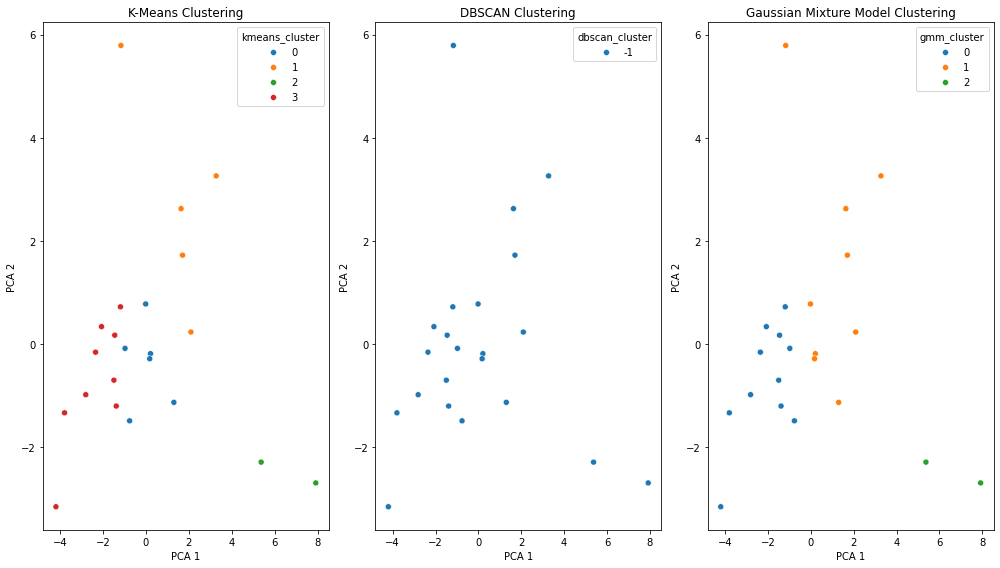

In [25]:


# 1. Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Elegimos 4 clusters como ejemplo
club_agg['kmeans_cluster'] = kmeans.fit_predict(club_agg_scaled)

# 2. Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)  # Ajustar parámetros de eps y min_samples según los datos
club_agg['dbscan_cluster'] = dbscan.fit_predict(club_agg_scaled)

# 3. Aplicar Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Elegimos 4 componentes como ejemplo
club_agg['gmm_cluster'] = gmm.fit_predict(club_agg_scaled)

# 4. Reducir dimensiones a 2D para visualizar clusters (usamos PCA)
pca = PCA(n_components=n_components)
club_agg_pca = pca.fit_transform(club_agg_scaled)

# Crear un DataFrame para facilitar la visualización
club_agg['pca_1'] = club_agg_pca[:, 0]
club_agg['pca_2'] = club_agg_pca[:, 1]
# club_agg['pca_3'] = club_agg_pca[:, 2]

# 5. Visualización de los clusters usando PCA
plt.figure(figsize=(14, 8))

# Gráfico de K-Means
plt.subplot(1, 3, 1)
sns.scatterplot(x='pca_1', y='pca_2', hue='kmeans_cluster', data=club_agg, palette='tab10')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Gráfico de DBSCAN
plt.subplot(1, 3, 2)
sns.scatterplot(x='pca_1', y='pca_2', hue='dbscan_cluster', data=club_agg, palette='tab10')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Gráfico de GMM
plt.subplot(1, 3, 3)
sns.scatterplot(x='pca_1', y='pca_2', hue='gmm_cluster', data=club_agg, palette='tab10')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()


In [26]:
grupos = len(club_agg['kmeans_cluster'].unique())
for i in range(grupos):
    subset = club_agg[club_agg['kmeans_cluster']==i]
    display(subset)
    display(subset['club'].to_list())

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,...,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to,kmeans_cluster,dbscan_cluster,gmm_cluster,pca_1,pca_2
0,AA Argentinos Juniors,46053000.0,35.0,61150000.0,27.514286,9.057143,1343.0,983.0,776.0,1.176610e+09,...,12439000.0,25.0,22900000.0,27.360000,1.0,0,-1,1,0.210096,-0.184734
31,CA Independiente,19256000.0,38.0,55950000.0,28.500000,12.947368,1296.0,1046.0,1016.0,1.785690e+09,...,13401000.0,28.0,29325000.0,28.392857,1.0,0,-1,1,-0.014311,0.778893
34,CA Lanús,55345000.0,28.0,46825000.0,26.357143,12.750000,940.0,964.0,1023.0,1.239100e+09,...,11678000.0,24.0,28475000.0,29.916667,1.0,0,-1,0,-0.763316,-1.485757
45,CA Rosario Central,30859000.0,31.0,43500000.0,27.225806,14.741935,1038.0,1014.0,1047.0,7.285400e+08,...,14229000.0,29.0,38100000.0,28.241379,1.0,0,-1,0,-0.977129,-0.081494
46,CA San Lorenzo de Almagro,24520000.0,34.0,55050000.0,28.617647,9.029412,1297.0,961.0,849.0,1.984780e+09,...,8921000.0,30.0,37925000.0,28.700000,1.0,0,-1,1,0.174852,-0.282053
60,CA Vélez Sarsfield,69432000.0,33.0,92675000.0,26.606061,14.454545,1109.0,969.0,796.0,2.081950e+09,...,20110000.0,29.0,48075000.0,28.000000,1.0,0,-1,1,1.301075,-1.127832


['AA Argentinos Juniors',
 'CA Independiente',
 'CA Lanús',
 'CA Rosario Central',
 'CA San Lorenzo de Almagro',
 'CA Vélez Sarsfield']

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,...,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to,kmeans_cluster,dbscan_cluster,gmm_cluster,pca_1,pca_2
19,CA Central Córdoba (SdE),9184000.0,49.0,15650000.0,30.122449,19.326531,1415.0,1352.0,1653.0,7.188100e+08,...,4184000.0,46.0,13475000.0,29.065217,1.0,1,-1,1,-1.168489,5.788399
54,CA Talleres,66227000.0,45.0,89925000.0,25.777778,9.777778,1728.0,1470.0,1211.0,1.768800e+09,...,23628000.0,36.0,49500000.0,25.472222,1.0,1,-1,1,3.272942,3.260758
73,CSD Defensa y Justicia,31683000.0,41.0,57500000.0,27.658537,5.902439,1748.0,1438.0,959.0,1.323360e+09,...,9525000.0,38.0,37225000.0,26.763158,1.0,1,-1,1,1.635994,2.625984
87,Club Estudiantes de La Plata,48647000.0,40.0,75625000.0,26.625000,11.125000,1419.0,1262.0,1171.0,1.715270e+09,...,23424000.0,33.0,40250000.0,27.272727,1.0,1,-1,1,1.706073,1.724729
98,Racing Club,51035000.0,36.0,70200000.0,29.000000,6.472222,1519.0,1217.0,881.0,2.063410e+09,...,33630000.0,31.0,52225000.0,27.709677,1.0,1,-1,1,2.094811,0.234463


['CA Central Córdoba (SdE)',
 'CA Talleres',
 'CSD Defensa y Justicia',
 'Club Estudiantes de La Plata',
 'Racing Club']

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,...,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to,kmeans_cluster,dbscan_cluster,gmm_cluster,pca_1,pca_2
16,CA Boca Juniors,100629000.0,34.0,129625000.0,26.588235,1.970588,1629.0,1173.0,595.0,4.293030e+09,...,46761000.0,26.0,67475000.0,27.730769,1.0,2,-1,2,5.371111,-2.285984
43,CA River Plate,147131000.0,33.0,158200000.0,26.272727,2.242424,1642.0,1483.0,675.0,4.027750e+09,...,75932000.0,28.0,109250000.0,27.642857,1.0,2,-1,2,7.920440,-2.688968


['CA Boca Juniors', 'CA River Plate']

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,...,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to,kmeans_cluster,dbscan_cluster,gmm_cluster,pca_1,pca_2
4,Arsenal FC,1581000.0,27.0,12875000.0,28.259259,19.888889,742.0,654.0,873.0,304200000.0,...,921000.0,18.0,7050000.0,26.777778,1.0,3,-1,0,-3.799060,-1.330722
11,CA Banfield,27808000.0,35.0,43800000.0,28.457143,21.485714,996.0,747.0,945.0,963750000.0,...,4531000.0,31.0,18725000.0,29.161290,1.0,3,-1,0,-2.073466,0.339450
23,CA Colón,3292000.0,22.0,23400000.0,30.727273,18.727273,627.0,489.0,775.0,836290000.0,...,2775000.0,19.0,11950000.0,30.421053,1.0,3,-1,0,-4.199620,-3.150574
30,CA Huracán,19162000.0,29.0,42775000.0,28.137931,11.517241,1061.0,792.0,697.0,628660000.0,...,7361000.0,37.0,30200000.0,28.945946,1.0,3,-1,0,-1.495876,-0.698199
38,CA Newell's Old Boys,19510000.0,30.0,36550000.0,27.133333,13.100000,1039.0,828.0,776.0,879500000.0,...,11953000.0,22.0,25225000.0,27.681818,1.0,3,-1,0,-1.387442,-1.199157
58,CA Unión (Santa Fe),18342000.0,32.0,26750000.0,26.906250,17.312500,981.0,833.0,1032.0,524960000.0,...,3676000.0,21.0,10325000.0,27.761905,1.0,3,-1,0,-2.351916,-0.155085
63,CD Godoy Cruz Antonio Tomba,25599000.0,31.0,46025000.0,25.806452,17.774194,905.0,851.0,1106.0,785010000.0,...,5714000.0,36.0,27675000.0,24.888889,1.0,3,-1,0,-1.191621,0.723261
82,Club Atlético Tucumán,12549000.0,28.0,24550000.0,29.071429,14.714286,898.0,692.0,830.0,446500000.0,...,3555000.0,28.0,18175000.0,28.107143,1.0,3,-1,0,-2.808281,-0.979262
93,Club de Gimnasia y Esgrima La Plata,18984000.0,36.0,32750000.0,27.527778,13.138889,1260.0,905.0,853.0,554860000.0,...,5949000.0,20.0,17325000.0,28.400000,1.0,3,-1,0,-1.456867,0.173884


['Arsenal FC',
 'CA Banfield',
 'CA Colón',
 'CA Huracán',
 "CA Newell's Old Boys",
 'CA Unión (Santa Fe)',
 'CD Godoy Cruz Antonio Tomba',
 'Club Atlético Tucumán',
 'Club de Gimnasia y Esgrima La Plata']

### Volviendo a la linea principal

In [27]:
# Obtener la cantidad de clusters únicos
grupos = len(club_agg['kmeans_cluster'].unique())

# Crear listas dinámicamente y asignar columnas al DataFrame
for i in range(grupos):
    # Obtener la lista de clubes del cluster `i`
    subset = club_agg[club_agg['kmeans_cluster'] == i]
    cluster_list = subset['club'].to_list()

    # Crear dinámicamente nombres de listas
    globals()[f"cl{i}"] = cluster_list

    # Crear las columnas en el DataFrame original
    df[f'ccl{i}'] = df["club_to"].isin(cluster_list).astype(int)
    df[f'vcl{i}'] = df["club_from"].isin(cluster_list).astype(int)


## Agregar info contractual manualmente scrapeada

In [28]:
ends_contract = pd.read_excel('df_transf12_manual_endscontract.xlsx') 

In [29]:
try:
   # Convertir las fechas a datetime y luego al formato ISO
   date_columns = ['transfer_date', 'ends_contract_date', 'archive_date']
   
   for column in date_columns:
       if column in ends_contract.columns:  # Verificar si la columna existe
           # Convertir a datetime usando el formato dd/mm/YYYY
           ends_contract[column] = pd.to_datetime(ends_contract[column], format='%d/%m/%Y', errors='coerce')
           # Convertir a formato ISO YYYY-mm-dd
           ends_contract[column] = ends_contract[column].dt.strftime('%Y-%m-%d')

except ValueError as e:
   print(f"Error en el formato de fechas: {e}")
   print("Verificar que todas las fechas estén en formato dd/mm/YYYY")

except Exception as e:
   print(f"Error inesperado: {e}")

In [30]:
ends_contract = corregir_temporada(ends_contract)
ends_contract

,player_name,player_url,player_id,age,position,code_from,code_to,club_nationality_from,club_nationality_to,market_value,...,ends_contract_date,url_contract,archive_date,n_transfer_date,n_last_possible_sell,rest_transfer_market,processing_status,club_from,club_to,transfer_fee
0,Fabricio Coloccini,/fabricio-coloccini/profil/spieler/6150,6150,39,Defensa central,1775,12301,Argentina,Argentina,100000.0,...,2021-06-30,https://web.archive.org/web/20210627220413/htt...,2021-06-27,0,0.0,0.0,processed,CA San Lorenzo de Almagro,CA Aldosivi,0
1,Néstor Ortigoza,/nestor-ortigoza/profil/spieler/26726,26726,36,Pivote,14602,1775,Argentina,Argentina,150000.0,...,2021-12-31,https://www.transfermarkt.es/nestor-ortigoza/t...,NaN,0,1.0,1.0,processed,AA Estudiantes (Río Cuarto),CA San Lorenzo de Almagro,0
2,Diego Braghieri,/diego-braghieri/profil/spieler/55149,55149,34,Defensa central,1775,333,Argentina,Argentina,950000.0,...,2022-12-31,https://www.transfermarkt.es/diego-braghieri/t...,NaN,0,3.0,3.0,processed,CA San Lorenzo de Almagro,CA Lanús,0
3,Gervasio Núñez,/gervasio-nunez/profil/spieler/55211,55211,33,Interior izquierdo,8056,12454,Bolivia,Argentina,200000.0,...,2021-12-31,https://www.transfermarkt.es/gervasio-nunez/tr...,NaN,0,1.0,1.0,processed,Blooming Santa Cruz,CA Sarmiento (Junín),0
4,Lucas Barrios,/lucas-barrios/profil/spieler/58516,58516,36,Delantero centro,1106,2402,Argentina,Argentina,250000.0,...,2021-06-30,https://web.archive.org/web/20210619044058/htt...,2021-06-19,0,0.0,0.0,processed,Club de Gimnasia y Esgrima La Plata,CSD Defensa y Justicia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,Guillermo May,/guillermo-may/profil/spieler/479718,479718,26,Delantero centro,1286,118373,Argentina,Australia,800000.0,...,2026-12-31,https://www.transfermarkt.es/guillermo-may/tra...,NaN,6,11.0,5.0,processed,CA Newell's Old Boys,Auckland FC,0
1478,Carlos Sánchez,/carlos-sanchez/profil/spieler/51226,51226,38,Pivote,1775,25184,Argentina,Argentina,100000.0,...,2024-12-31,https://www.transfermarkt.es/carlos-sanchez/tr...,NaN,6,7.0,1.0,processed,CA San Lorenzo de Almagro,CA Barracas Central,0
1479,Leonardo Jara,/leonardo-jara/profil/spieler/116163,116163,33,Lateral derecho,1029,333,Argentina,Argentina,200000.0,...,2024-12-31,https://www.transfermarkt.es/leonardo-jara/tra...,NaN,6,7.0,1.0,processed,CA Vélez Sarsfield,CA Lanús,0
1480,Sebastián Zeballos,/sebastian-zeballos/profil/spieler/1229026,1229026,23,Extremo izquierdo,12179,3938,Argentina,Argentina,100000.0,...,2025-12-31,https://www.transfermarkt.es/sebastian-zeballo...,NaN,6,9.0,3.0,processed,CS Independiente Rivadavia,CA Talleres,0


In [31]:
df["archive_date"] = np.nan
df.drop(columns='season_combined', inplace=True)

# Columnas clave para el merge (deben coincidir en ambos DataFrames)
merge_keys = ['player_name', 'season', 'season_part', 'code_from', 'code_to']

# Columnas a combinar
cols_to_combine = ['ends_contract_date', 'url_contract', 'archive_date']

# Realizar el merge (left join para mantener todos los registros de df)
df = df.merge(
    ends_contract[merge_keys + cols_to_combine],  # Seleccionar solo columnas relevantes
    on=merge_keys,
    how='left',
    suffixes=('', '_ends')  # Sufijo para columnas del segundo DataFrame
)

# Actualizar las columnas de df con datos de ends_contract solo donde hay NaN
for col in cols_to_combine:
    df[col] = df[col].fillna(df[f"{col}_ends"])
    df.drop(columns=f"{col}_ends", inplace=True)  # Eliminar columnas temporales



In [32]:
# Convertir la columna de fechas a datetime
df["ends_contract_date"] = pd.to_datetime(df["ends_contract_date"], errors="coerce")

# Reorganizar columnas
columns_to_move = ["transfer_date", "ends_contract_date", "url_contract", "archive_date"]
df = df[[col for col in df.columns if col not in columns_to_move] + columns_to_move]

# Crear la columna `n_transfer_date`
def calculate_n_transfer_date(season, season_part):
    base_value = (season - 2021) * 2
    adjustment = 1 if season_part == "invierno" else 0
    return base_value + adjustment

df["n_transfer_date"] = df.apply(
    lambda row: calculate_n_transfer_date(row["season"], row["season_part"]), axis=1
)

# Crear la columna `n_last_possible_sell`
def calculate_n_last_possible_sell(ends_contract_date):
    if pd.isna(ends_contract_date):
        return np.nan
    year = ends_contract_date.year
    month = ends_contract_date.month
    base_value = (year - 2021) * 2
    adjustment = 1 if month > 9 else 0
    return base_value + adjustment

df["n_last_possible_sell"] = df["ends_contract_date"].apply(calculate_n_last_possible_sell)

# Crear la columna `rest_transfer_market`
def calculate_rest_transfer_market(n_last_possible_sell, n_transfer_date):
    if pd.isna(n_last_possible_sell):
        return np.nan
    return n_last_possible_sell - n_transfer_date

df["rest_transfer_market"] = df.apply(
    lambda row: calculate_rest_transfer_market(row["n_last_possible_sell"], row["n_transfer_date"]), axis=1
)

df

,player_name,player_url,player_id,age,nationality,comunitario,extranjero,position,transfer_fee,season,...,vcl2,ccl3,vcl3,transfer_date,ends_contract_date,url_contract,archive_date,n_transfer_date,n_last_possible_sell,rest_transfer_market
0,Fabricio Coloccini,/fabricio-coloccini/profil/spieler/6150,6150,39,"['Argentina', 'Italia']",1,0,Defensa central,0,2021,...,0,0,0,2021-07-01,2021-06-30,https://web.archive.org/web/20210627220413/htt...,2021-06-27,0,0.0,0.0
1,Alejandro Aranda,/alejandro-aranda/profil/spieler/440018,440018,26,['Argentina'],0,0,Delantero centro,0,2021,...,0,0,0,2021-07-01,2021-06-30,https://www.soloascenso.com.ar/notas/nueva-chi...,NaN,0,0.0,0.0
2,Francisco Cerro,/francisco-cerro/profil/spieler/125107,125107,33,['Argentina'],0,0,Pivote,0,2021,...,0,0,0,2021-07-01,2021-12-31,https://www.transfermarkt.es/francisco-cerro/t...,NaN,0,1.0,1.0
3,Martín Cauteruccio,/martin-cauteruccio/profil/spieler/76599,76599,34,"['Uruguay', 'Italia']",1,1,Delantero centro,0,2021,...,0,0,0,2021-07-01,2022-06-30,https://www.transfermarkt.es/martin-cauterucci...,NaN,0,2.0,2.0
4,Federico Gino,/federico-gino/profil/spieler/273130,273130,28,"['Uruguay', 'Italia']",1,1,Mediocentro,0,2021,...,0,0,0,2021-07-19,2021-12-31,https://www.transfermarkt.es/federico-gino/tra...,NaN,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,Francisco Fydriszewski,/francisco-fydriszewski/profil/spieler/337921,337921,31,"['Argentina', 'Polonia']",1,0,Delantero centro,0,2024,...,0,0,0,2024-08-09,2025-12-31,https://www.transfermarkt.es/francisco-fydrisz...,NaN,6,9.0,3.0
1482,Andrés Vombergar,/andres-vombergar/profil/spieler/486926,486926,29,"['Eslovenia', 'Argentina']",0,0,Delantero centro,0,2024,...,0,0,0,2024-07-19,2024-06-30,https://web.archive.org/web/20240530102336/htt...,2024-05-30,6,6.0,0.0
1483,Iker Muniain,/iker-muniain/profil/spieler/54235,54235,31,['España'],1,1,Mediocentro ofensivo,0,2024,...,0,0,0,2024-09-06,NaT,NaN,NaN,6,NaN,NaN
1484,Agustín Giay,/agustin-giay/profil/spieler/849582,849582,20,['Argentina'],0,0,Lateral derecho,7000000,2024,...,0,0,0,2024-07-10,2026-12-31,https://www.transfermarkt.es/agustin-giay/tran...,NaN,6,11.0,5.0


In [33]:
# Contar los NaN en la columna "ends_contract_date"
nan_ends_contract_date = df["ends_contract_date"].isna().sum()

# Contar los NaN en la columna "rest_transfer_market"
nan_rest_transfer_market = df["rest_transfer_market"].isna().sum()

# Contar los valores negativos en la columna "rest_transfer_market"
negative_rest_transfer_market = (df["rest_transfer_market"] < 0).sum()

# Imprimir los resultados
print(f"NaN en 'ends_contract_date': {nan_ends_contract_date}")
print(f"NaN en 'rest_transfer_market': {nan_rest_transfer_market}")
print(f"Valores negativos en 'rest_transfer_market': {negative_rest_transfer_market}")


NaN en 'ends_contract_date': 282
NaN en 'rest_transfer_market': 282
Valores negativos en 'rest_transfer_market': 0


## Guardado final

In [34]:
df.to_excel('df_transf12_full.xlsx', index=False)